<a href="https://colab.research.google.com/github/claramarto11/AAvanceproject/blob/Jo%C3%A3o-Alex/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Advanced Automation 2023's Project
# Recommendation Engine & Hit Predictor // Spotify API

#!pip install requests
#!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import os
import base64
from requests import post, get
import json
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
#Authentication 

idj= "011d29dea2f644f78b4f5368ba0d317e"
secretj= "86b22acbd4bf498591b038d69adea504"

client_credentials_manager = SpotifyClientCredentials(client_id=idj, client_secret=secretj)
spj = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

playlist_link1 = "https://open.spotify.com/playlist/1mXeUy5gxuy8juz2oiL5H6?si=537119c577b7402c"
playlist_id1 = playlist_link1.split("/")[-1].split("?")[0]

playlist_link0 = "https://open.spotify.com/playlist/0taMcedcWUKNvRKicX09ZX?si=2c702c6b8a3d44b1"
playlist_id0 = playlist_link0.split("/")[-1].split("?")[0]

idr= "295795f897a34beea5e5647da3e24aed"
secretr= "f83912f9833f4d08a4adff6aa6e737c0"

client_credentials_manager = SpotifyClientCredentials(client_id=idr, client_secret=secretr)
spr = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

playlist_linkrita = "https://open.spotify.com/playlist/29sYKlIhyolbVhyudK5q5R?si=202a07665e124cd8&pt=b7c7740f225a0ffc5cf5b2e0f98deda1"
playlist_idrita = playlist_linkrita.split("/")[-1].split("?")[0]

In [3]:
def call_playlistj(playlist_id):
    results = spj.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = spj.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = spj.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = spj.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [4]:
def call_playlistr(playlist_id):
    results = spr.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = spr.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = spr.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = spr.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [5]:
df1r=call_playlistr(playlist_idrita)
df1r.to_csv('Playlist_rita_1.csv')
df1r

df1j=call_playlistj(playlist_id1)
df1j.to_csv('Playlist_joao_1.csv')
#df1j

df0j=call_playlistj(playlist_id0)
df0j.to_csv('Playlist_joao_0.csv')
#df0j

In [ ]:
#for i in range(len(df1r)):
#  for j in range(len(df0j)):
#    if df1r['id'][i]==df0j['id'][j]:
#      print(i)
#      continue      

In [ ]:
#for i in range(len(df1r)):
#  for k in range(len(df1j)):
#    if df1r['id'][i]==df1j['id'][k]:
#      print(i)
#      continue      

In [6]:
df0r= pd.concat([df1j, df0j])
df0r.to_csv('Playlist_rita_0.csv')
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,67,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,65,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,62,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
141,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
142,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
143,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [7]:
vector = np.arange(0, len(df0r))
df0r=df0r.set_axis(vector, axis='index', inplace=False)

In [8]:
df1r.drop([128,210,243,253,436,437,438,463,488], axis=0, inplace=True)

In [9]:
vector1 = np.arange(0, len(df1r))
df1r=df1r.set_axis(vector1, axis='index', inplace=False)

In [10]:
df1r.drop(['id'], axis=1)
df0r.drop(['id'], axis=1)

,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,Oh! Darling - Remastered 2009,The Beatles,67,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,Octopus's Garden - Remastered 2009,The Beatles,65,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,I Want You (She's So Heavy) - Remastered 2009,The Beatles,62,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
482,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
483,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
484,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [11]:
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,67,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,65,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,62,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4
482,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4
483,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4
484,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4


In [12]:
df1r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3h04eZTnmFLRMjZajbrp2R,Need You Tonight,INXS,75,1987,0.795,0.630,10,-7.217,0,0.0419,0.575000,0.0894,0.785,108.701,181107,4
1,3SQ9Hb9rfpJ02AWfaOPhpy,"It's A Man's, Man's, Man's World",James Brown & The Famous Flames,66,1966-01-01,0.539,0.240,3,-16.632,0,0.6870,0.000051,0.1330,0.567,80.816,167373,3
2,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,Coldplay,86,2017-04-07,0.617,0.635,11,-6.769,0,0.0498,0.000014,0.1640,0.446,103.019,247160,4
3,6lL3GA2rq8UvdvjMdp2H5g,Actions,John Legend,42,2020-06-19,0.572,0.898,9,-3.661,0,0.1540,0.000000,0.2320,0.494,82.934,174133,4
4,2cY8x0jQ1wWEipUCouclsD,What You Do to Me,John Legend,37,2016-12-02,0.447,0.781,9,-3.469,0,0.0564,0.000000,0.2040,0.740,144.530,201387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,2zf0MOOCd9qp6piRwroPjG,Bed Of Roses,Bon Jovi,43,2010-11-09,0.305,0.534,5,-6.499,1,0.1190,0.000000,0.1890,0.148,164.715,395520,3
667,3iZZAEx3R8pYNNdiIZ8HEs,Always,Bon Jovi,42,2010-11-09,0.381,0.665,4,-5.556,1,0.1350,0.000000,0.1070,0.329,143.448,353107,4
668,3U3FEk6xlkLa9TsijsZAiW,Lay Your Hands On Me,Bon Jovi,36,2010-11-09,0.340,0.963,2,-3.830,1,0.1920,0.000000,0.1510,0.371,100.313,229293,4
669,68l9gMSvLerIxE0irCTl8P,In These Arms,Bon Jovi,39,2010-11-09,0.509,0.918,4,-2.981,1,0.0104,0.000017,0.2050,0.439,123.279,319293,4


In [14]:
df0r['Ratings'] = 0
df1r['Ratings'] = 1

In [15]:
df0r

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Ratings
0,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,The Beatles,73,1969-09-26,0.396,0.338,0,-10.872,1,0.19800,0.000003,0.1380,0.377,133.522,182293,4,0
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,The Beatles,67,1969-09-26,0.422,0.656,4,-8.412,1,0.01260,0.027900,0.2680,0.549,173.930,207240,3,0
2,0suLngfo7rJoetk7Ub6N8l,Octopus's Garden - Remastered 2009,The Beatles,65,1969-09-26,0.626,0.512,1,-9.150,0,0.15500,0.000046,0.2150,0.730,92.225,170720,4,0
3,3Z25k4ZF6QENy2d9YatsM5,I Want You (She's So Heavy) - Remastered 2009,The Beatles,62,1969-09-26,0.370,0.515,2,-9.487,0,0.02330,0.205000,0.0966,0.420,115.732,467320,4,0
4,3oEo8Pqm5IAi8wQfCI5BpR,Yellow Submarine - Remastered 2009,The Beatles,47,1969-01-17,0.605,0.536,1,-10.069,1,0.51800,0.000000,0.5280,0.688,110.849,159720,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4,0
482,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4,0
483,0o2ODr6zCp6DZdTczHsGSv,David Bentley: In A Broken Dream (2008),Python Lee Jackson,29,2009,0.539,0.214,4,-12.889,0,0.76800,0.018600,0.1160,0.255,80.119,223000,4,0
484,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4,0


In [17]:
df01 = pd.concat([df1r,df0r]).drop_duplicates().reset_index(drop=True)
df01

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Ratings
0,3h04eZTnmFLRMjZajbrp2R,Need You Tonight,INXS,75,1987,0.795,0.630,10,-7.217,0,0.04190,0.575000,0.0894,0.785,108.701,181107,4,1
1,3SQ9Hb9rfpJ02AWfaOPhpy,"It's A Man's, Man's, Man's World",James Brown & The Famous Flames,66,1966-01-01,0.539,0.240,3,-16.632,0,0.68700,0.000051,0.1330,0.567,80.816,167373,3,1
2,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,Coldplay,86,2017-04-07,0.617,0.635,11,-6.769,0,0.04980,0.000014,0.1640,0.446,103.019,247160,4,1
3,6lL3GA2rq8UvdvjMdp2H5g,Actions,John Legend,42,2020-06-19,0.572,0.898,9,-3.661,0,0.15400,0.000000,0.2320,0.494,82.934,174133,4,1
4,2cY8x0jQ1wWEipUCouclsD,What You Do to Me,John Legend,37,2016-12-02,0.447,0.781,9,-3.469,0,0.05640,0.000000,0.2040,0.740,144.530,201387,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1i6N76fftMZhijOzFQ5ZtL,Psycho Killer - 2005 Remaster,Talking Heads,78,1977-09-16,0.721,0.521,2,-8.123,1,0.07080,0.005450,0.1270,0.942,123.118,261413,4,0
1148,2rIMlCvI8R3NiMHDmT3NH9,A Próxima Viagem,Cassete Pirata,0,2020-02-01,0.454,0.567,2,-6.317,0,0.03950,0.000877,0.3160,0.382,149.958,214079,4,0
1149,22qEkskBVTRiuF3utjqTTF,Sem Ar,Cassete Pirata,0,2020-02-01,0.589,0.573,0,-7.727,1,0.00244,0.261000,0.1370,0.542,140.064,277093,4,0
1150,0HsJSLDb0WeBhLbN8H53M8,Backflip,jaymeso,0,2021-09-21,0.656,0.881,0,-5.059,1,0.39000,0.000010,0.1400,0.346,149.846,210825,4,0


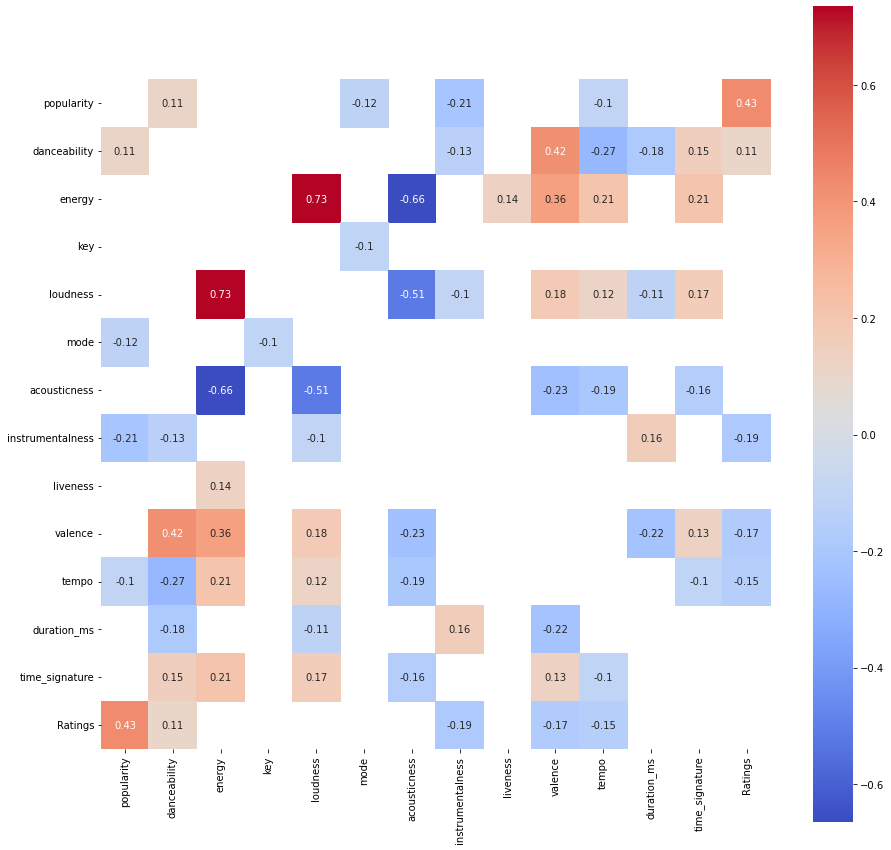

In [30]:
## Import pearsonr function from scipy -- calculate the correlation and p-value between two columns
from scipy.stats import pearsonr

## Calculate the correlations between the columns
df01_corrs = df01.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = df01.corr(method=lambda x, y: pearsonr(x, y)[1])

## Establish the mask, to hide values without a given statistical significance
ptg_stat_sig = 0.3/100
mask = pval > ptg_stat_sig

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df01_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)